<a href="https://colab.research.google.com/github/brondave12/Data-Preprocessing/blob/main/Messy%20Data%20Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries for data preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load dataset into python
data = pd.read_excel('messy_dataset_100_entries.xlsx')

In [ ]:
# Dispaly data
display(data)

In [5]:
# Check rows and columns
data.shape

(105, 9)

In [6]:
# Check datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          105 non-null    object 
 1   Age           53 non-null     float64
 2   AGE           53 non-null     float64
 3   Email         105 non-null    object 
 4   phone_number  89 non-null     object 
 5   date_joined   80 non-null     object 
 6   Extra Column  105 non-null    object 
 7   Gender        105 non-null    object 
 8   Income        105 non-null    object 
dtypes: float64(2), object(7)
memory usage: 7.5+ KB


In [7]:
# Correct datatpye for date format
data['date_joined'] = pd.to_datetime(data['date_joined'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          105 non-null    object        
 1   Age           53 non-null     float64       
 2   AGE           53 non-null     float64       
 3   Email         105 non-null    object        
 4   phone_number  89 non-null     object        
 5   date_joined   12 non-null     datetime64[ns]
 6   Extra Column  105 non-null    object        
 7   Gender        105 non-null    object        
 8   Income        105 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 7.5+ KB


In [ ]:
# Confirm number of missing values
data.isnull().sum()

In [ ]:
# Calcualte percentage for missing values in each column
missing_percentages = (data.isnull().sum() / len(data)) * 100
print('Missing Value Percentages:')
print(missing_percentages)

In [48]:
# Drop the 'AGE' column as it appears to be a duplicate of 'Age'
if 'AGE' in data.columns:
    data = data.drop(columns=['AGE'])

# Standardize all remaining column names to lower case
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Display the new column names to confirm the changes
print("New column names:")
print(data.columns)

New column names:
Index(['name', 'age', 'email', 'extra_column', 'gender', 'income'], dtype='object')


In [ ]:
# Check for duplicates
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("\nHere are the duplicate rows:")
    display(data[data.duplicated(keep=False)].sort_values(by=list(data.columns)))
else:
    print("No duplicate rows found.")

In [12]:
# Remove duplicate rows, keeping the first occurrence
data = data.drop_duplicates()

print(f"Number of rows after removing duplicates: {data.shape[0]}")
display(data.head())

Number of rows after removing duplicates: 100


,name,age,email,phone_number,date_joined,extra_column,gender,income
0,Anthony Martin,54.0,brett58@gmail.com,001-223-257-5963x2863,1970-12-13,redundant,male,₦194028
1,Alexandra Wise,26.0,bakermichele@gmail.com,1277547287143,NaT,redundant,male,₦326484
2,Garrett Owens,32.0,hillchristina@nelson.biz,2832660556486,NaT,redundant,Female,₦121842
3,Emily Hines,39.0,joseph50@baker.com,528-567-8767,NaT,redundant,female,₦379218
4,Peter Hernandez,NaN,josephchristopher@hotmail.com,263.213.4719x4557,1992-10-05,redundant,Male,₦121826


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
# Check for correlation or patterns in missing values
full_missing_correlation = data.isnull().corr()
print("Full nullity correlation matrix:")
display(full_missing_correlation)

In [ ]:
# Check for unique values in each column
print("\n--- Unique Values per Column ---")
for column in data.columns:
    unique_count = data[column].nunique()
    print(f"\nColumn '{column}':")
    display(f"  Number of unique values: {unique_count}")

    # Display unique values for 'object' columns, but only if there aren't too many
    if data[column].dtype == 'object' and unique_count < 50:
        print(f"  Unique values: {data[column].unique()}")
    elif data[column].dtype == 'object' and unique_count >= 50:
        print("  (Too many unique object values to display all, showing first 50 unique values:)")
        print(data[column].value_counts().head(50).index.tolist())
    elif data[column].dtype == 'datetime64[ns]':
        print(f"  Min Date: {data[column].min()}, Max Date: {data[column].max()}")
    else: # For numeric types, describe basic stats
        print(f"  Min: {data[column].min()}, Max: {data[column].max()}, Mean: {data[column].mean():.2f}")

In [23]:
# Convert 'gender' column to lowercase first to handle case variations
data['gender'] = data['gender'].str.lower()

# Define a mapping for common variations
gender_mapping = {
    'm': 'male',
    'male': 'male',
    'man': 'male',
    'f': 'female',
    'female': 'female',
    'woman': 'female'
}

# Apply the mapping and fill any unmapped values with 'other'
data['gender'] = data['gender'].replace(gender_mapping).fillna('other')

# Display the unique values and their counts to verify the changes
print("Unique values in 'gender' column after standardization:")
print(data['gender'].value_counts())


Unique values in 'gender' column after standardization:
gender
male      67
female    33
Name: count, dtype: int64


In [ ]:
# Remove the currency symbol and convert 'income' to numeric
# To check for any negative or weird income value
data['income'] = data['income'].str.replace('₦', '').astype(float)

# Display descriptive statistics for the income column
print("Descriptive statistics for 'income' column:")
display(data['income'].describe())

# Optionally, display a histogram to visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns
# Plot Income values to verify any weird income
plt.figure(figsize=(10, 6))
sns.histplot(data['income'], kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income (₦)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import missingno as msno
msno.heatmap(data)
plt.show()

In [19]:
# Check for correlation for missing values
missing_correlation = data[['age', 'date_joined']].isnull().corr()
print("Nullity correlation between 'age' and 'date_joined':")
display(missing_correlation)

Nullity correlation between 'age' and 'date_joined':


,age,date_joined
age,1.000000,-0.061546
date_joined,-0.061546,1.000000


In [24]:
# Confirm column headings to verify changes
data.head()

,name,age,email,phone_number,date_joined,extra_column,gender,income
0,Anthony Martin,54.0,brett58@gmail.com,001-223-257-5963x2863,1970-12-13,redundant,male,194028.0
1,Alexandra Wise,26.0,bakermichele@gmail.com,1277547287143,NaT,redundant,male,326484.0
2,Garrett Owens,32.0,hillchristina@nelson.biz,2832660556486,NaT,redundant,female,121842.0
3,Emily Hines,39.0,joseph50@baker.com,528-567-8767,NaT,redundant,female,379218.0
4,Peter Hernandez,NaN,josephchristopher@hotmail.com,263.213.4719x4557,1992-10-05,redundant,male,121826.0


In [ ]:
# Perform exploratory Analysis
data.describe()

In [27]:
# Drop date_joined column
data = data.drop(columns=['date_joined'])

In [28]:
# Check the skewness for the age column
skewness_age = data['age'].skew()
print(f"Skewness for 'age' column: {skewness_age:.2f}")

if skewness_age > 0.5:
    print("The 'age' distribution is moderately to highly right-skewed (positive skew).")
elif skewness_age < -0.5:
    print("The 'age' distribution is moderately to highly left-skewed (negative skew).")
else:
    print("The 'age' distribution is approximately symmetrical.")

Skewness for 'age' column: 0.20
The 'age' distribution is approximately symmetrical.


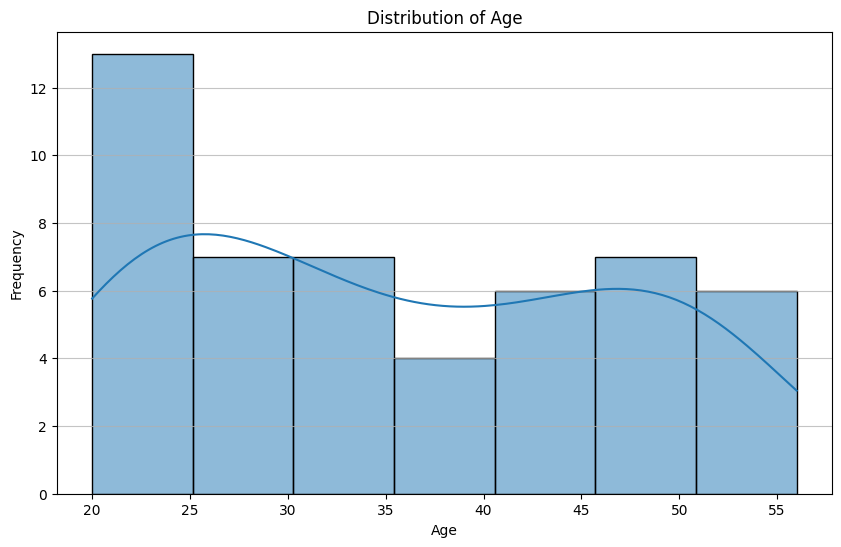

In [29]:
# Plot the skewness of age column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [30]:
# Check the skewness for male ages
male_data = data[data['gender'] == 'male']
skewness_male_age = male_data['age'].skew()
print(f"Skewness for 'age' column (Males only): {skewness_male_age:.2f}")

if skewness_male_age > 0.5:
    print("The 'age' distribution for males is moderately to highly right-skewed (positive skew).")
elif skewness_male_age < -0.5:
    print("The 'age' distribution for males is moderately to highly left-skewed (negative skew).")
else:
    print("The 'age' distribution for males is approximately symmetrical.")

Skewness for 'age' column (Males only): -0.08
The 'age' distribution for males is approximately symmetrical.


In [40]:
# Check skewness for female ages
female_data = data[data['gender'] == 'female'].copy()
skewness_female_age = female_data['age'].skew()
print(f"Skewness for 'age' column (Females only): {skewness_female_age:.2f}")

if skewness_female_age > 0.5:
    print("The 'age' distribution for females is moderately to highly right-skewed (positive skew).")
elif skewness_female_age < -0.5:
    print("The 'age' distribution for females is moderately to highly left-skewed (negative skew).")
else:
    print("The 'age' distribution for females is approximately symmetrical.")

Skewness for 'age' column (Females only): 0.78
The 'age' distribution for females is moderately to highly right-skewed (positive skew).


In [ ]:
# Plot skewness for male ages
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(male_data['age'].dropna(), kde=True)
plt.title('Distribution of Age for Males')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# Plot skewness for female ages
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(female_data['age'].dropna(), kde=True)
plt.title('Distribution of Age for Females')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [34]:
# Check the number of missing values for males and females
missing_age_males = male_data['age'].isnull().sum()
print(f"Number of males with missing 'age': {missing_age_males}")

missing_age_females = female_data['age'].isnull().sum()
print(f"Number of females with missing 'age': {missing_age_females}")

Number of males with missing 'age': 34
Number of females with missing 'age': 16


In [ ]:
# Using KNN imputation method to fill missing values for male ages
from sklearn.impute import KNNImputer

# Select the relevant columns for imputation from male_data. 'age' is the target, 'income' is a feature.
# We need to make a copy to avoid SettingWithCopyWarning
male_data_for_imputation = male_data[['age', 'income']].copy()

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5) # You can adjust n_neighbors

# Perform imputation
male_data_imputed_array = imputer.fit_transform(male_data_for_imputation)

# Convert the imputed array back to a DataFrame
male_data_imputed = pd.DataFrame(male_data_imputed_array, columns=['age', 'income'], index=male_data_for_imputation.index)

# Update the 'age' column in the original male_data DataFrame with imputed values
male_data['age'] = male_data_imputed['age']

# Verify that there are no more missing values in 'age' for males
print(f"Missing 'age' values in male_data after KNN imputation: {male_data['age'].isnull().sum()}")

print("\nFirst 5 rows of male_data after imputation:")
display(male_data.head())

In [ ]:
# Using KNN to fill missing values for females
from sklearn.impute import KNNImputer

# Select the relevant columns for imputation from female_data. 'age' is the target, 'income' is a feature.
# We need to make a copy to avoid SettingWithCopyWarning
female_data_for_imputation = female_data[['age', 'income']].copy()

# Initialize KNNImputer
imputer_female = KNNImputer(n_neighbors=5) # You can adjust n_neighbors

# Perform imputation
female_data_imputed_array = imputer_female.fit_transform(female_data_for_imputation)

# Convert the imputed array back to a DataFrame
female_data_imputed = pd.DataFrame(female_data_imputed_array, columns=['age', 'income'], index=female_data_for_imputation.index)

# Update the 'age' column in the original female_data DataFrame with imputed values
female_data['age'] = female_data_imputed['age']

# Verify that there are no more missing values in 'age' for females
print(f"Missing 'age' values in female_data after KNN imputation: {female_data['age'].isnull().sum()}")

print("\nFirst 5 rows of female_data after imputation:")
display(female_data.head())

In [46]:
# Update 'age' for males in the main DataFrame
data.loc[data['gender'] == 'male', 'age'] = male_data['age']

# Update 'age' for females in the main DataFrame
data.loc[data['gender'] == 'female', 'age'] = female_data['age']

print("Missing values after merging imputed ages:")
display(data.isnull().sum())

Missing values after merging imputed ages:


,0
name,0
age,0
email,0
phone_number,15
extra_column,0
gender,0
income,0


In [ ]:
data = data.drop(columns=['phone_number'])
print("Missing values after dropping 'phone_number")
display(data.isnull().sum())

In [ ]:
# dropping extra_columns
data = data.drop(columns=['extra_column'])
print("Missing values after dropping extra_column")
display(data.isnull().sum())

In [ ]:
# Encode the 'gender' column
data['gender_encoded'] = data['gender'].map({'male': 0, 'female': 1})

print("Original 'gender' column unique values and counts:")
print(data['gender'].value_counts())

print("\nEncoded 'gender_encoded' column unique values and counts:")
print(data['gender_encoded'].value_counts())

display(data.head())

In [58]:
# Drop the original 'gender' column
data = data.drop(columns=['gender'])

print("DataFrame after dropping 'gender' column:")
display(data.head())

DataFrame after dropping 'gender' column:


,name,age,email,income,gender_encoded
0,Anthony Martin,54.0,brett58@gmail.com,194028.0,0
1,Alexandra Wise,26.0,bakermichele@gmail.com,326484.0,0
2,Garrett Owens,32.0,hillchristina@nelson.biz,121842.0,1
3,Emily Hines,39.0,joseph50@baker.com,379218.0,1
4,Peter Hernandez,32.6,josephchristopher@hotmail.com,121826.0,0
